# See how Twitter Hashtags look like on the Background of Stock Prices

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./../..")

In [3]:
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
from money_machine.data.dataset import load_tweeter_hashtag_data
from money_machine.data.dataset import load_data

## Twitter Hashtags 

In [5]:
hashtags_url = "https://bitinfocharts.com/comparison/bitcoin-tweets.html#3y"
hashtags_count = load_tweeter_hashtag_data(hashtags_url)

## Stock prices

In [6]:
ticker = "BTC-USD"

In [7]:
start_date_hashtags = dt.date.fromisoformat(str(hashtags_count.index.values[0])[:10])
end_date_hashtags = dt.date.fromisoformat(str(hashtags_count.index.values[-1])[:10])

In [8]:
data = load_data([ticker], start_date_hashtags, end_date_hashtags)[ticker]

In [9]:
close = data["Close"].to_frame()

In [10]:
start_date_prices = dt.date.fromisoformat(str(close.index.values[0])[:10])
end_date_prices = dt.date.fromisoformat(str(close.index.values[-1])[:10])

# Plot

In [11]:
start_date = max(start_date_hashtags, start_date_prices)
end_date = min(end_date_hashtags, end_date_prices)

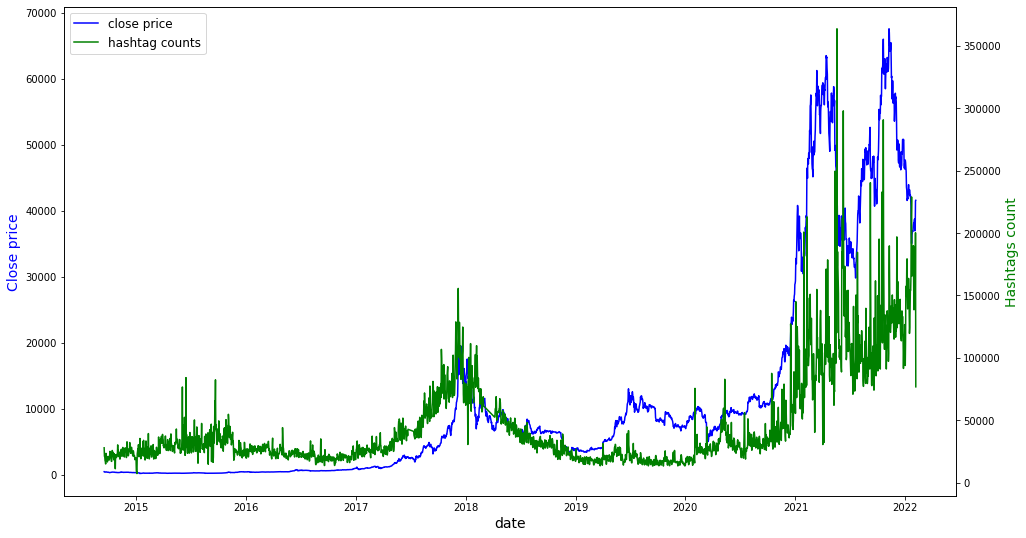

In [12]:
fig,ax = plt.subplots(figsize=(16, 9))
res1 = ax.plot(close[start_date:end_date], label="close price", c="blue")
ax.set_ylabel("Close price", size=14, c="blue")
ax.set_xlabel("date", size=14)
ax2=ax.twinx()
res2 = ax2.plot(hashtags_count[start_date:end_date], label="hashtag counts", c="green")
ax2.set_ylabel("Hashtags count", size=14, c="green")
res = res1 + res2
labels = [l.get_label() for l in res]
ax.legend(res, labels, fontsize= 12)
plt.show()

### Zoom in from 2021

In [13]:
start_date = dt.date(2021, 1, 1)

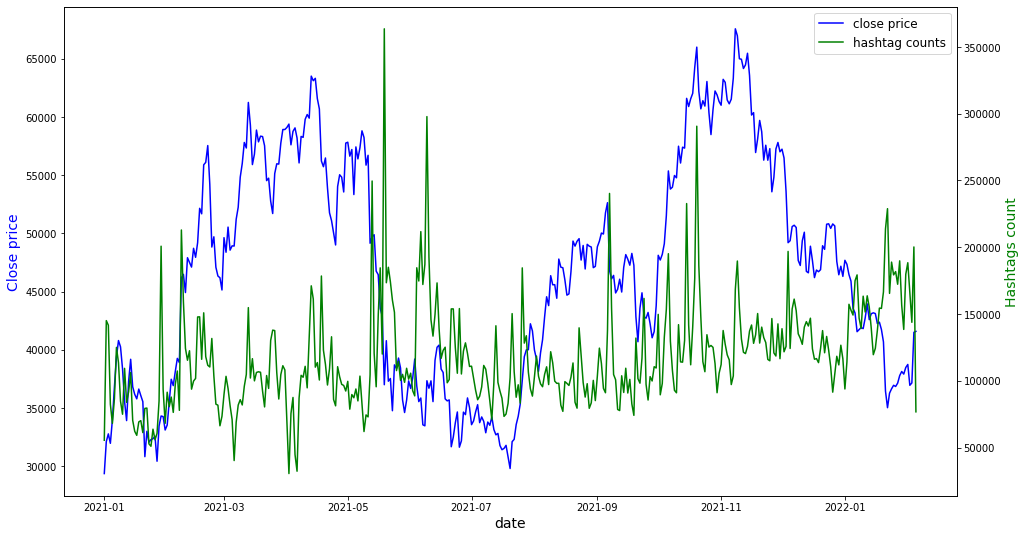

In [14]:
fig,ax = plt.subplots(figsize=(16, 9))
res1 = ax.plot(close[start_date:end_date], label="close price", c="blue")
ax.set_ylabel("Close price", size=14, c="blue")
ax.set_xlabel("date", size=14)
ax2=ax.twinx()
res2 = ax2.plot(hashtags_count[start_date:end_date], label="hashtag counts", c="green")
ax2.set_ylabel("Hashtags count", size=14, c="green")
res = res1 + res2
labels = [l.get_label() for l in res]
ax.legend(res, labels, fontsize= 12)
plt.show()